<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/knn_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("glass.csv")

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


split the dataset

In [9]:
DF= df.iloc[:,0:9]

In [10]:
DF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

In [14]:

# Normalization function
stscaler = StandardScaler().fit(DF)
X = stscaler.transform(DF)

In [15]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [16]:
DF2 = pd.DataFrame(X,columns=df.columns[:-1])

In [17]:
DF2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [18]:
x= DF2
y= df['Type']

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [21]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,-0.813735,-0.721560,0.580575,0.913656,0.270553,0.296533,-0.695130,-0.352877,-0.586451
161,0.321669,0.284953,0.594473,-1.395110,-0.001209,-0.518017,-0.047163,-0.050492,1.882411
109,-0.061200,0.383150,-1.865511,-1.776558,2.328182,-0.763919,1.431893,-0.352877,-0.586451
127,0.806856,0.456797,-0.281114,-0.029927,-0.855320,-0.010844,0.628977,-0.352877,1.162326
95,0.077425,-0.058734,0.518033,-0.029927,-0.505911,0.019893,-0.251413,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
106,4.252673,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888
14,-0.242732,-0.979326,0.629219,-0.270841,0.827019,0.127475,-0.321844,-0.352877,-0.586451
92,-0.820336,-0.353324,0.504135,0.271217,0.788195,-0.656337,-0.399319,-0.352877,1.368065
179,0.051020,0.837308,-0.343656,0.431826,0.024673,-0.763919,0.255692,-0.352877,-0.586451


In [22]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111
197,-0.361554,1.586056,-1.865511,1.797009,0.814078,-0.763919,-0.004904,0.977618,-0.586451
66,1.041198,-0.439246,0.670914,-1.154195,-0.557675,-0.471910,0.628977,-0.352877,1.162326
191,-0.774128,1.770175,-1.865511,1.877314,0.814078,-0.763919,-0.138723,0.937300,0.339372
117,-0.424265,0.383150,0.691761,0.732970,-0.764732,0.219689,-0.758518,-0.352877,-0.586451
111,2.978645,-2.930981,-1.865511,-1.395110,0.555256,-0.763919,4.228014,-0.352877,-0.586451
15,-0.249333,-0.733835,0.594473,-0.431451,0.762313,0.127475,-0.399319,-0.352877,-0.586451
86,-0.883047,-0.206029,0.559728,0.050378,0.775254,-0.179902,-0.652871,-0.352877,-0.586451
75,-0.813735,-0.476069,0.622270,0.130683,0.607021,0.296533,-0.702173,-0.352877,-0.586451
144,-0.582693,-0.512893,0.344306,-0.431451,0.412905,0.127475,-0.103508,-0.352877,1.882411


In [23]:
y_train

79     2
161    3
109    2
127    2
95     2
      ..
106    2
14     1
92     2
179    6
102    2
Name: Type, Length: 171, dtype: int64

In [24]:
y_test

9      1
197    7
66     1
191    7
117    2
111    2
15     1
86     2
75     2
144    2
182    6
170    5
141    2
73     2
178    6
167    5
190    7
18     1
45     1
184    6
98     2
209    7
211    7
195    7
148    3
104    2
30     1
25     1
175    5
16     1
55     1
138    2
158    3
93     2
69     1
203    7
171    5
152    3
97     2
84     2
101    2
200    7
60     1
Name: Type, dtype: int64

build the model

In [26]:
num_folds = 10
kfold = KFold(n_splits=10)

In [27]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, x, y, cv=kfold)

In [28]:
results

array([0.5       , 0.81818182, 0.68181818, 0.90909091, 0.47619048,
       0.28571429, 0.38095238, 0.        , 0.19047619, 0.04761905])

In [29]:
print(results.mean())

0.42900432900432905


In [31]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
preds = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
print(accuracy_score(y_test,preds))

0.7674418604651163


In [36]:
model.score(x_train,y_train)

0.8187134502923976

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.69      0.79      0.73        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.72      0.67      0.69        43
weighted avg       0.74      0.77      0.74        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


grid Search for Algorithm Tuning

In [39]:
 #Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [41]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [43]:
print(grid.best_score_)
print(grid.best_params_)

0.6729789590254706
{'n_neighbors': 2}


Visualizing the CV results

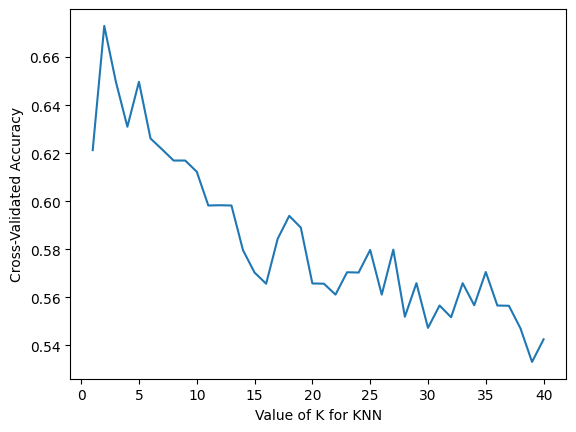

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()